## k 최근접이웃 알고리즘
* 머신러닝 분류에 자주 사용되는 대표 알고리즘
* 얼굴인식, 개인영화추천, 질병 유전자 패턴 식별에 활용
* KNN의 K는 가장 가까운 이웃 '하나'가 아니고
  훈련데이터 중 새로운 데이터와
  가장 가까운 K개의 이웃을 찾는다는 의미

* 즉, 하나의 관측값은 거리가 가까운 k개의
  이웃 관측값과 비슷한 특성을 갖는다고 가정함
* 따라서, k개 이웃의 레이블들 중
  다수결로 가장 많은 레이블 값을 결과로 반환

* KNN 알고리즘에서는 k를 얼마나 설정하느냐에 따라
  결과와 성능이 달라짐
   + k가 작으면 데이터의 범위가 좁아짐 - 과적합 위험
   + k가 크면 데이터의 범위가 넓어짐 - 일반화 위험
   + 일반적으로 k값은 데이터 총 건수에 제곱근을 씌운 값

* 제대로 된 분석을 위해서는 각 변수에 대해 표준화 작업이 필요할 수 있음
* 거리 측정 알고리즘 : 유클리드, minkowski, 맨해튼

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### iris 데이터를 이용해서 KNN 분석

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
data = iris.data
target = iris.target

X_train, X_test, y_train, y_test= train_test_split(data, target, train_size=0.75,
                random_state=2309260945, stratify=target)

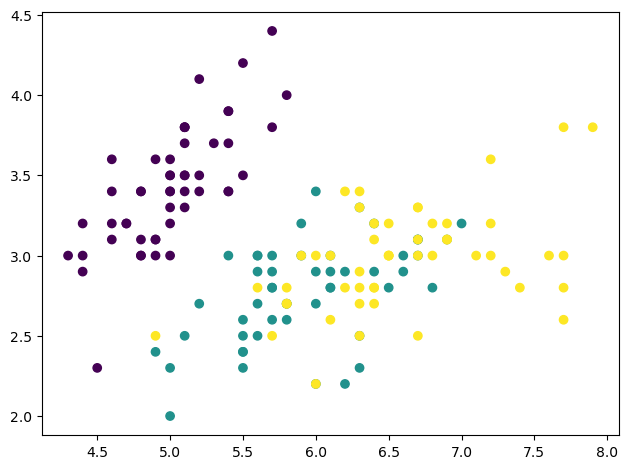

In [5]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
plt.tight_layout()

In [6]:
# 분석1
knnclf = KNeighborsClassifier(n_neighbors=1)
knnclf.fit(X_train, y_train)
knnclf.score(X_train, y_train)

1.0

In [7]:
pred = knnclf.predict(X_test)
accuracy_score(pred, y_test)

0.9736842105263158

In [8]:
# 분석2
knnclf = KNeighborsClassifier(n_neighbors=3)
knnclf.fit(X_train, y_train)
knnclf.score(X_train, y_train)

0.9464285714285714

In [9]:
pred = knnclf.predict(X_test)
accuracy_score(pred, y_test)

0.9736842105263158

In [10]:
# 분석3
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(X_train, y_train)
knnclf.score(X_train, y_train)

0.9553571428571429

In [11]:
pred = knnclf.predict(X_test)
accuracy_score(pred, y_test)

0.9736842105263158

### 최적의 K값을 찾기 위한 교차검증 실시

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
scores = []
for k in range(1, 30, 2):
    knnclf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knnclf, X_train, y_train, cv=10, scoring='accuracy') # cv는 반복횟수 scoring은 정확도
    scores.append(score.mean())

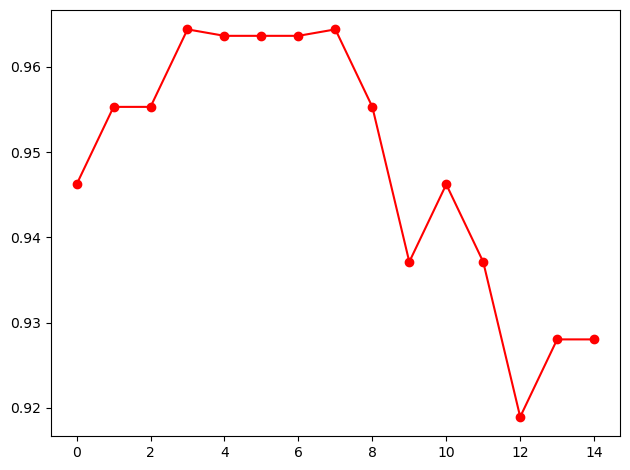

In [14]:
plt.plot(scores, 'ro-')
plt.tight_layout()
# 적절한 k값은 3 또는 7 정도임

## k값 선택기준
* k값에 따라 정확도가 점점 줄다가
  어느 순간 확 주는 지점이 생기는데
  그래프상에서는 가늠하기 다소 어려움
* 자주 나타나는 정확도 지표 중 선두에 나오는 지점
* 너무 높은 정확도는 과적합의 위험이 있기 때문에 주의

### KNN 알고리즘을 이용해서 과일/채소/단백질을 구분하기
*  당도 6, 아삭함 4인 토마토는 과일인가 채소인가?

In [15]:
fresh = pd.read_csv('data/fresh.csv', encoding='euc-kr')
fresh.columns = ['name', 'sweet', 'crunchy', 'kind']
fresh.head()

,name,sweet,crunchy,kind
0,포도,8,5,과일
1,생선,2,2,단백질
2,당근,6,10,채소
3,오렌지,7,3,과일
4,샐러리,3,8,채소


In [16]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'IBM Plex Sans KR'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.size'] = 11

<Axes: xlabel='kind', ylabel='count'>

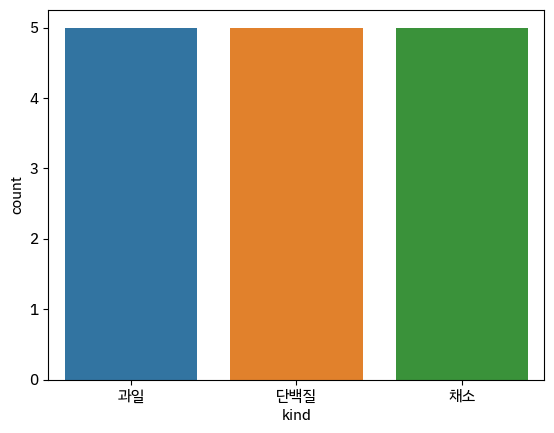

In [18]:
sns.countplot(x='kind', data=fresh)

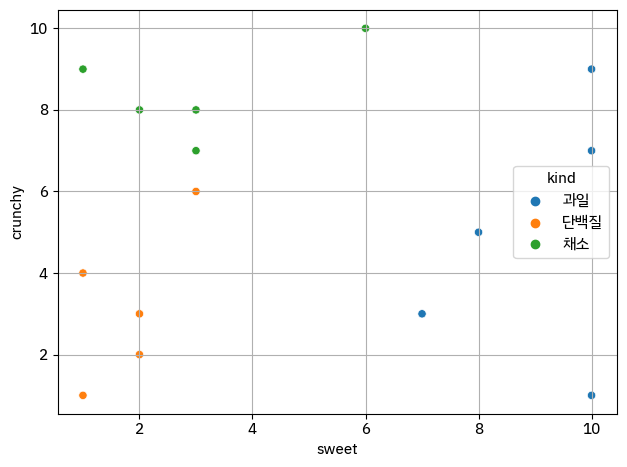

In [22]:
sns.scatterplot(x='sweet', y='crunchy', data=fresh, hue='kind')
plt.grid()
plt.tight_layout()

In [26]:
### 데이터 전처리
fresh['kind'] = pd.Categorical(fresh['kind'])
fresh['kind'] = fresh['kind'].cat.codes

In [30]:
### 교차검증으로 적절한 K값 알아내기
scores = []
for k in range(1, 10, 2):
    knnclf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knnclf, data, target, cv=5, scoring='accuracy') # cv는 반복횟수 scoring은 정확도
    scores.append(score.mean())

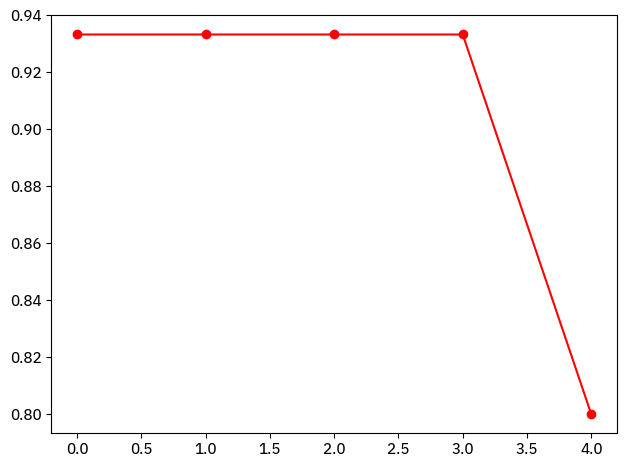

In [31]:
plt.plot(scores, 'ro-')
plt.tight_layout()
# 적절한 K값은 3으로 선택

In [32]:
### 채택된 K값으로 모델 생성
knnclf = KNeighborsClassifier(n_neighbors=3)
knnclf.fit(data, target)
knnclf.score(data, target)

0.9333333333333333

In [33]:
# 당도 6, 아삭함 4인 토마토는 과일인가 채소인가?
newOne = np.array([[6, 4]])
knnclf.predict(newOne)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int8)

## 농구선수 게임데이터를 이용해서 포지션 예측
* 2017 NBA 농구선수의 실제 데이터를 참고
* player 선수명, pos 포지션, 3p 3점슛 성공횟수
* 2p 2점슛 성공횟수, TRB 리바운드 성공횟수
* AST 어시스트 성공횟수, STL 스틸 성공횟수, BLK 블로킹 성공횟수
* SG 슈팅가드(장거리 슛터) 와
  C 센터 (골대 근처 블로킹,스틸,리바운드 전문)를 구분하는 모델 생성

In [56]:
bbplayer = pd.read_csv('data/basketball_stat.csv')
bbplayer.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


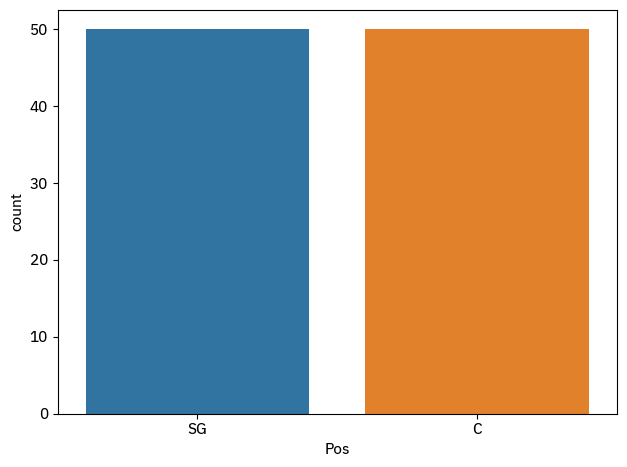

In [57]:
sns.countplot(x='Pos', data=bbplayer)
plt.tight_layout()

In [58]:
### 데이터 전처리 - 레이블 인코딩
bbplayer.Pos = bbplayer.Pos.map({'C':0, 'SG':1})
bbplayer.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,1,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,0,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,0,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,0,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,1,1.5,3.5,4.3,3.4,0.8,0.5


In [65]:
### 데이터 분할
data = bbplayer.iloc[:, 2:]
target = bbplayer.Pos

X_train, X_test, y_train, y_test= train_test_split(data,target, 
            train_size=0.75,stratify=target,random_state=2309261145)

In [66]:
#### 교차검증으로 적절한 k값 알아냄
scores = []
for k in range(1, 30, 2):
    knnclf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knnclf, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

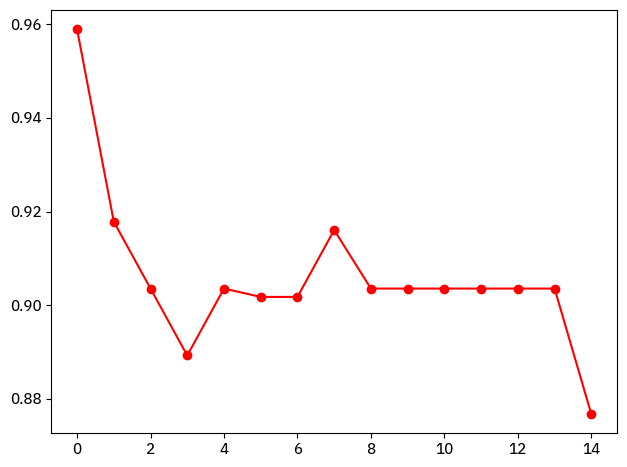

In [67]:
plt.plot(scores, 'ro-')
plt.tight_layout()
# 최적의 K 값은 5

In [68]:
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(X_train, y_train)
knnclf.score(X_train, y_train)

0.9466666666666667

In [69]:
pred = knnclf.predict(X_test)
accuracy_score(pred, y_test)

1.0

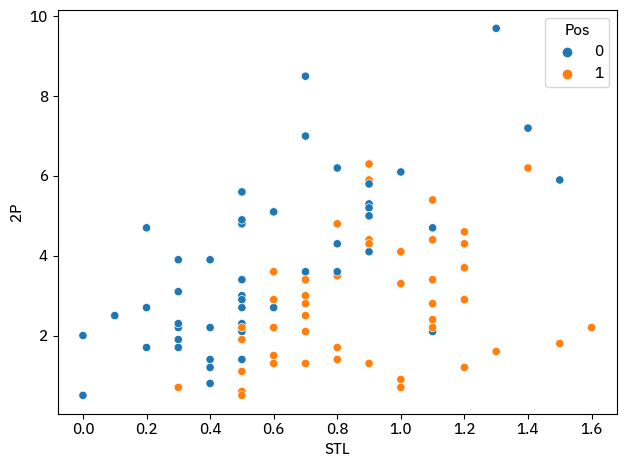

In [70]:
# 컬럼 축소를 위한 시각화
# 스틸/2점슛
sns.scatterplot(x='STL', y='2P', data=bbplayer, hue='Pos')
plt.tight_layout()

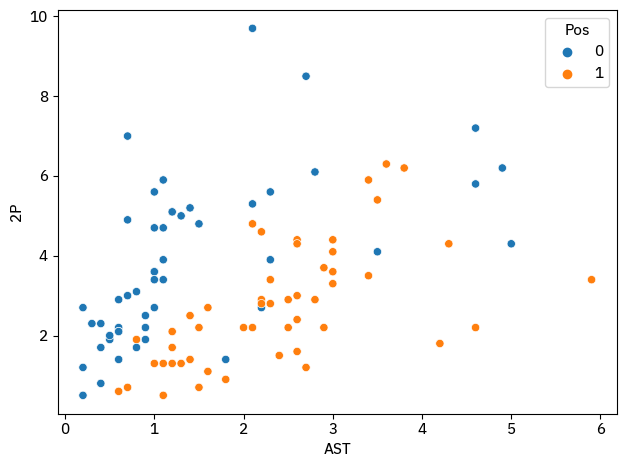

In [71]:
# 어시스트/2점슛
sns.scatterplot(x='AST', y='2P', data=bbplayer, hue='Pos')
plt.tight_layout()

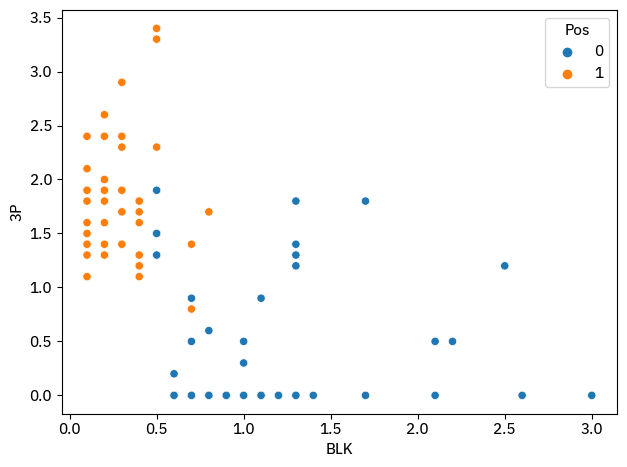

In [73]:
# 블로킹/3점슛
sns.scatterplot(x='BLK', y='3P', data=bbplayer, hue='Pos')
plt.tight_layout()

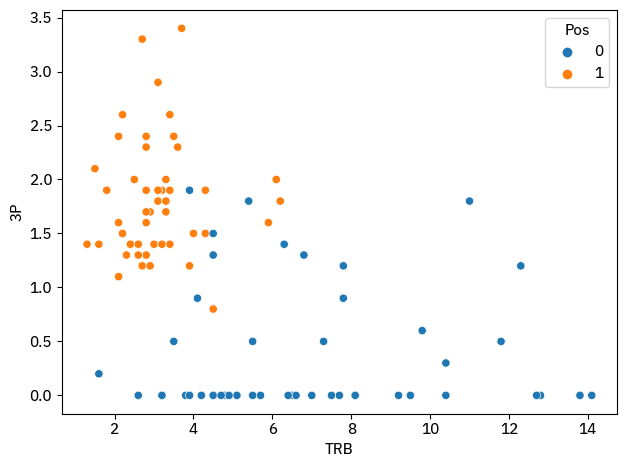

In [74]:
# 리바운드/3점슛
sns.scatterplot(x='TRB', y='3P', data=bbplayer, hue='Pos')
plt.tight_layout()

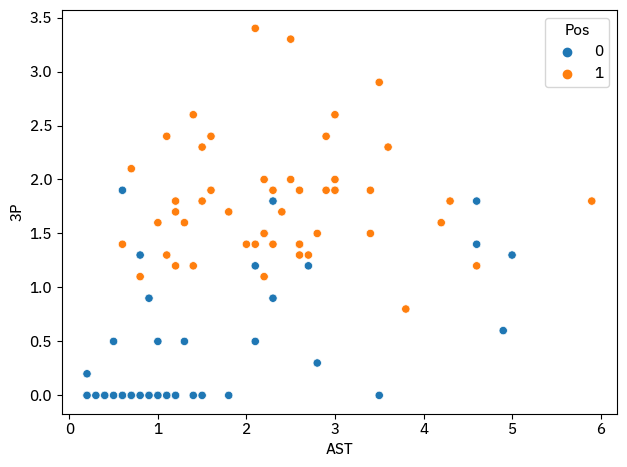

In [75]:
# 어시스트/3점슛
sns.scatterplot(x='AST', y='3P', data=bbplayer, hue='Pos')
plt.tight_layout()

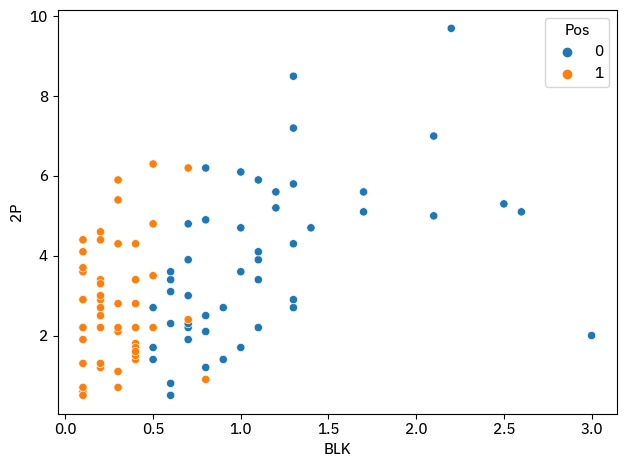

In [76]:
# 블로킹/2점슛
sns.scatterplot(x='BLK', y='2P', data=bbplayer, hue='Pos')
plt.tight_layout()

In [78]:
# 따라서, 3점슛, 블로킹, 리바운드 등을 분석에 사용함
data = bbplayer.iloc[:, [2,4,7]]
target = bbplayer.Pos

X_train, X_test, y_train, y_test= train_test_split(data,target, 
            train_size=0.75,stratify=target,random_state=2309261205)

In [79]:
#### 교차검증으로 적절한 k값 알아냄
scores = []
for k in range(1, 30, 2):
    knnclf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knnclf, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())

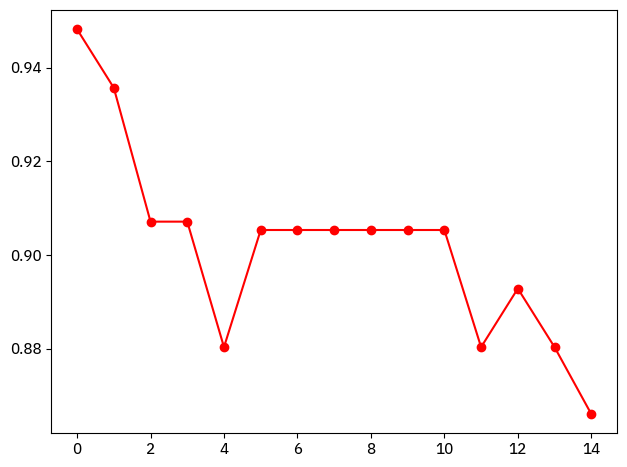

In [80]:
plt.plot(scores, 'ro-')
plt.tight_layout()
# K는 5를 선택

In [81]:
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(X_train, y_train)
knnclf.score(X_train, y_train)

0.96

In [82]:
pred = knnclf.predict(X_test)
accuracy_score(pred, y_test)

0.8